In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2687,-115.55,32.98,33.0,2266.0,365.0,952.0,360.0,5.4349,143000.0,INLAND
7679,-118.09,33.93,37.0,1950.0,356.0,1183.0,338.0,4.1449,175300.0,<1H OCEAN
1667,-122.21,38.02,15.0,2150.0,327.0,1094.0,324.0,6.0224,198500.0,NEAR BAY
16993,-122.27,37.56,5.0,4921.0,1179.0,1810.0,1073.0,5.6936,322200.0,NEAR BAY
2630,-124.21,40.75,32.0,1218.0,331.0,620.0,268.0,1.6528,58100.0,NEAR OCEAN


In [3]:
housing_data = housing_data.dropna()
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing_data.shape

(20433, 10)

In [5]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)
housing_data.shape


(19475, 10)

In [6]:
housing_data = pd.get_dummies(housing_data, columns=["ocean_proximity"])

In [7]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [11]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [19]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True, fit_intercept=False).fit(x_train, y_train)

C:\Users\79384\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [20]:
print('Training Score:', linear_model.score(x_train, y_train))

Training Score: 0.6127387880528421


In [21]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [23]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

ocean_proximity_INLAND       -2.128242e+06
ocean_proximity_NEAR BAY     -2.096975e+06
ocean_proximity_<1H OCEAN    -2.090199e+06
ocean_proximity_NEAR OCEAN   -2.086316e+06
ocean_proximity_ISLAND       -1.909051e+06
longitude                    -2.446378e+04
latitude                     -2.267652e+04
population                   -2.885814e+01
total_rooms                  -8.220434e+00
households                    3.738680e+01
total_bedrooms                9.884420e+01
housing_median_age            9.598328e+02
median_income                 3.886692e+04
dtype: float64

In [27]:
y_pred = linear_model.predict(x_test)

df_pred_actual = pd.DataFrame({"predicted": y_pred, "actual": y_test})

df_pred_actual.head(10)

,predicted,actual
9018,365069.003244,318500.0
5084,139079.352085,110000.0
11585,232921.316710,216600.0
7916,209878.572426,200800.0
11920,108589.944098,98100.0
2097,43251.321226,49100.0
19440,202710.310797,158100.0
17987,243070.666052,212500.0
16485,141784.884109,174200.0
5173,144589.929532,101300.0


In [29]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6133192078436056

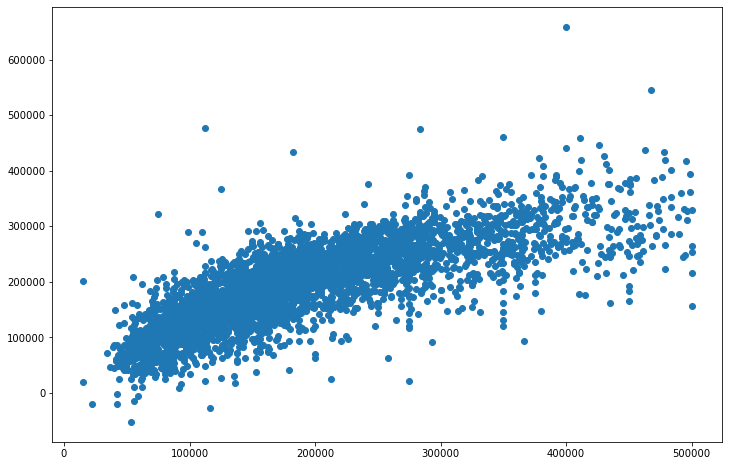

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)